In [1]:
2+2

4

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [8]:
df = pd.read_csv(r"C:\Users\Dell\OneDrive - Higher Education Commission\Desktop\internship\Task # 07\Mall_Customers.csv")

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [16]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

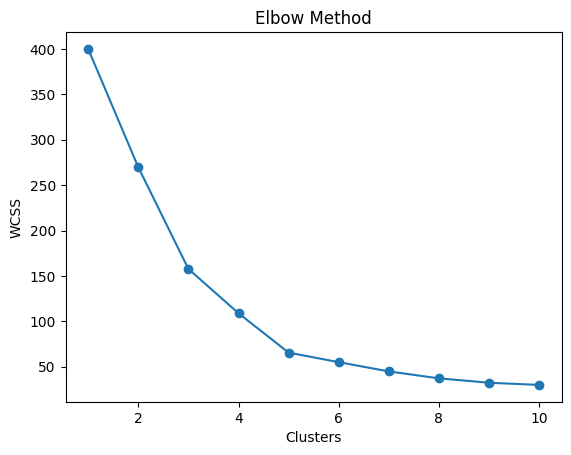

In [18]:
# Elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, marker="o"); plt.xlabel("Clusters"); plt.ylabel("WCSS"); plt.title("Elbow Method"); plt.show()


In [19]:
# Fit final model
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

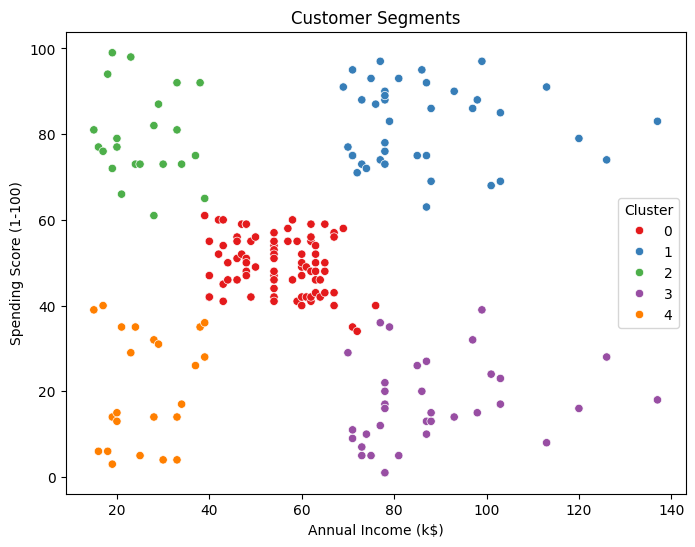

In [20]:
# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette="Set1")
plt.title("Customer Segments"); plt.show()

In [23]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:,0], X_pca[:,1]

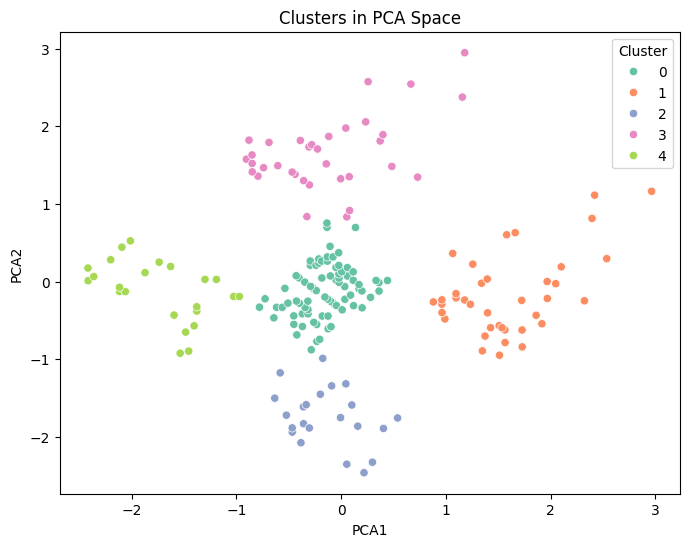

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette="Set2")
plt.title("Clusters in PCA Space"); plt.show()

In [25]:
# Insights
for c in df['Cluster'].unique():
    cluster_data = df[df['Cluster']==c]
    print(f"Cluster {c} Summary:")
    print(cluster_data[['Annual Income (k$)','Spending Score (1-100)']].mean())
    print("Customers:", len(cluster_data), "\n")

Cluster 4 Summary:
Annual Income (k$)        26.304348
Spending Score (1-100)    20.913043
dtype: float64
Customers: 23 

Cluster 2 Summary:
Annual Income (k$)        25.727273
Spending Score (1-100)    79.363636
dtype: float64
Customers: 22 

Cluster 0 Summary:
Annual Income (k$)        55.296296
Spending Score (1-100)    49.518519
dtype: float64
Customers: 81 

Cluster 1 Summary:
Annual Income (k$)        86.538462
Spending Score (1-100)    82.128205
dtype: float64
Customers: 39 

Cluster 3 Summary:
Annual Income (k$)        88.200000
Spending Score (1-100)    17.114286
dtype: float64
Customers: 35 

